# SchemDraw Cheat Sheet
* Webpage: https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html
* Repo: https://bitbucket.org/cdelker/schemdraw
* Documentation: https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html
* Blog: https://www.collindelker.com/2014/08/29/electrical-schematic-drawing-python.html
* Sample gallery: 
  * https://cdelker.bitbucket.io/SchemDraw/gallery.html
  * https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html

In [1]:
!pip install SchemDraw

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import SchemDraw as schem
import SchemDraw.elements as e
import SchemDraw.logic as l

## Output formats

In [3]:
!pip install xkcd

  Stored in directory: C:\Users\silvan.zahno\AppData\Local\pip\Cache\wheels\d4\66\16\c37844eef2393dd2f27543490271bd108d33f6e5c71af32212
Successfully built xkcd


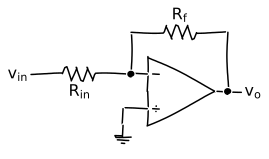

In [4]:
import matplotlib.pyplot as plt

import SchemDraw as schem
import SchemDraw.elements as e

with plt.xkcd():

  d = schem.Drawing(inches_per_unit=.5)
  op = d.add(e.OPAMP)
  d.add(e.LINE, d='left', xy=op.in2, l=d.unit/4)
  d.add(e.LINE, d='down', l=d.unit/5)
  d.add(e.GND)
  d.add(e.LINE, d='left', xy=op.in1, l=d.unit/6)
  d.add(e.DOT)
  d.push()
  Rin = d.add(e.RES, d='left', xy=op.in1-[d.unit/5,0], botlabel='$R_{in}$', lftlabel='$v_{in}$')
  d.pop()
  d.add(e.LINE, d='up', l=d.unit/2)
  Rf = d.add(e.RES,  d='right', l=d.unit*1, label='$R_f$')
  d.add(e.LINE, d='down', toy=op.out)
  d.add(e.DOT)
  d.add(e.LINE, d='left', tox=op.out)
  d.add(e.LINE, d='right', l=d.unit/4, rgtlabel='$v_{o}$')

  d.draw()

## Black Box

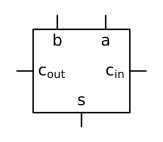

In [5]:
import SchemDraw as schem
import SchemDraw.logic as l

d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['b','a']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$s$']}
B = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs))

d.draw()

## Additional Elements
```
 name:  A name string for the element. Currently only used for testing.
    paths: A list of each path line in the element. For example, a capacitor
           has two paths, one for each capacitor "plate". On 2-terminal
           elements, the leads will be automatically extended away from the
           first and last points of the first path, and don't need to
           be included in the path.
    base:  Dictionary defining a base element. For example, the variable
           resistor has a base of resistor, then adds an additional path.
    shapes: A list of shape dictionaries.
            'shape' key can be [ 'circle', 'poly', 'arc', 'arrow' ]
            Other keys depend on the shape as follows.
            circle:
                'center': xy center coordinate
                'radius': radius of circle
                'fill'  : [True, False] fill the circle
                'fillcolor' : color for fill
            poly:
                'xy' : List of xy coordinates defining polygon
                'closed': [True, False] Close the polygon
                'fill'  : [True, False] fill the polygon
                'fillcolor' : color for fill
            arc:
                'center' : Center coordinate of arc
                'width', 'height': width and height of arc
                'theta1' : Starting angle (degrees)
                'theta2' : Ending angle (degrees)
                'angle'  : Rotation angle of entire arc
                'arrow'  : ['cw', 'ccw'] Add an arrowhead, clockwise or counterclockwise
            arrow:
                'start'  : start of arrow
                'end'    : end of arrow
                'headwidth', 'headlength': width and length of arrowhead
    theta: Default angle (in degrees) for the element. Overrides the current
           drawing angle.
    anchors: A dictionary defining named positions within the element. For
             example, the NFET element has a 'source', 'gate', and 'drain'
             anchor. Each anchor will become an attribute of the element class
             which can then be used for connecting other elements.
    extend: [True, False] Extend the leads to fill the full element length.
    move_cur: [True, False] Move the drawing cursor location after drawing.
    color: A matplotlib-compatible color for the element. Examples include
           'red', 'blue', '#34ac92'
    drop: Final location to leave drawing cursor.
    lblloc: ['top', 'bot', 'lft', 'rgt'] default location for text label.
            Defaults to 'top'.
    lblofst: Default distance between element and text label.
    labels: List of (label, pos) tuples defining text labels to always draw
            in the element.
    ls    : [':', '--', '-'] linestyle (same as matplotlib). Only applies to paths.
```

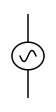

In [6]:
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e
import numpy as np
sin_y = np.linspace(.25,.75,num=25) - 0.5
sin_x = .2 * np.sin((sin_y-.25)*np.pi*2/.5) + 0.5
sin_path = np.transpose(np.vstack((sin_x,sin_y)))
SOURCE_SIN = {
    'name'  : 'SOURCE_SIN',
    'base'  : e.SOURCE,
    'paths' : [sin_path]
    }

d = schem.Drawing()
B = d.add(SOURCE_SIN)
d.draw()

## Analog Elements
### Basic Elements

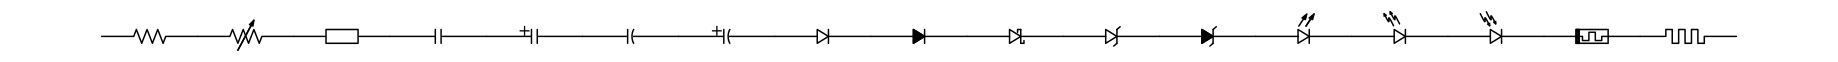

In [7]:
d = schem.Drawing()
d.add(e.RES)
d.add(e.RES_VAR)
d.add(e.RBOX)
d.add(e.CAP)
d.add(e.CAP_P)
d.add(e.CAP2)
d.add(e.CAP2_P)
d.add(e.DIODE)
d.add(e.DIODE_F)
d.add(e.SCHOTTKY)
d.add(e.ZENER)
d.add(e.ZENER_F)
d.add(e.LED)
d.add(e.LED2)
d.add(e.PHOTODIODE)
d.add(e.MEMRISTOR)
d.add(e.MEMRISTOR2)
d.draw()

### Connection & Dots & Lines

In [8]:
d = schem.Drawing()
d.add(e.DOT_OPEN)
d.add(e.DOT)
d.add(e.ELLIPSIS)
d.add(e.LINE)
d.draw()

### Labels

In [9]:
d = schem.Drawing()
d.add(e.GAP_LABEL)
d.add(e.GAP)
d.add(e.LABEL)
d.draw()

### Power

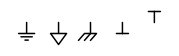

In [10]:
d = schem.Drawing()
d.add(e.GND, xy=(0,0))
d.add(e.GND_SIG, xy=(1,0))
d.add(e.GND_CHASSIS, xy=(2,0))
d.add(e.VSS, xy=(3,0))
d.add(e.VDD, xy=(4,0))
d.draw()

### OpAmp

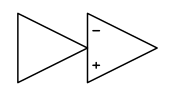

In [11]:
d = schem.Drawing()
d.add(e.OPAMP_NOSIGN)
d.add(e.OPAMP)
d.draw()

### FET's

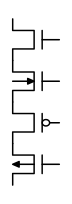

In [12]:
d = schem.Drawing()
d.add(e.NFET)
d.add(e.NFET4)
d.add(e.PFET)
d.add(e.PFET4)
d.draw()

### BJT Transistors

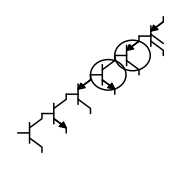

In [13]:
d = schem.Drawing()
d.add(e.BJT)
d.add(e.BJT_NPN)
d.add(e.BJT_PNP)
d.add(e.BJT_NPN_C)
d.add(e.BJT_PNP_C)
d.add(e.BJT_PNP_2C)
d.draw()

### Inductor

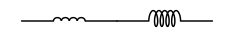

In [14]:
d = schem.Drawing()
d.add(e.INDUCTOR)
d.add(e.INDUCTOR2)
d.draw()

### Source

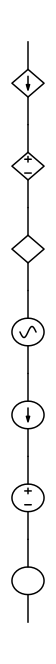

In [15]:
d = schem.Drawing()
d.add(e.SOURCE)
d.add(e.SOURCE_V)
d.add(e.SOURCE_I)
d.add(e.SOURCE_SIN)
d.add(e.SOURCE_CONT)
d.add(e.SOURCE_CONT_V)
d.add(e.SOURCE_CONT_I)
d.draw()

### Batteries

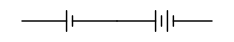

In [16]:
d = schem.Drawing()
d.add(e.BAT_CELL)
d.add(e.BATTERY)
d.draw()

### Meters

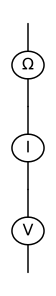

In [17]:
d = schem.Drawing()
d.add(e.METER_V)
d.add(e.METER_I)
d.add(e.METER_OHM)
d.draw()

### Arrows for labeling current

In [18]:
d = schem.Drawing()
d.add(e.ARROWLINE)
d.draw()

### Switches

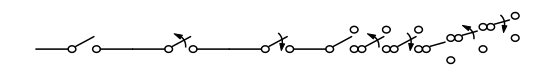

In [19]:
d = schem.Drawing()
d.add(e.SWITCH_SPST)
d.add(e.SWITCH_SPST_OPEN)
d.add(e.SWITCH_SPST_CLOSE)
d.add(e.SWITCH_SPDT)
d.add(e.SWITCH_SPDT_OPEN)
d.add(e.SWITCH_SPDT_CLOSE)
d.add(e.SWITCH_SPDT2)
d.add(e.SWITCH_SPDT2_OPEN)
d.add(e.SWITCH_SPDT2_CLOSE)
d.draw()

### Buttons

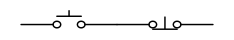

In [20]:
d = schem.Drawing()
d.add(e.BUTTON)
d.add(e.BUTTON_NC)
d.draw()

### Speakers, Buld etc.

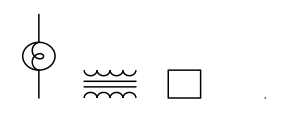

In [21]:
d = schem.Drawing()
d.add(e.LAMP, xy=(0,0))
d.add(e.transformer(), xy=(3,0))
d.add(e.blackbox(w=1,h=1), xy=(5,0))
d.add(e.mux(), xy=(7,0))
d.draw()

## Digital Elements

### AND

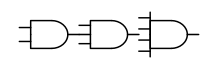

In [22]:
d = schem.Drawing()
d.add(l.AND2)
d.add(l.AND3)
d.add(l.AND4)
d.draw()

### NAND

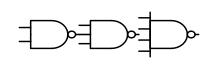

In [23]:
d = schem.Drawing()
d.add(l.NAND2)
d.add(l.NAND3)
d.add(l.NAND4)
d.draw()

### OR

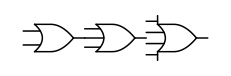

In [24]:
d = schem.Drawing()
d.add(l.OR2)
d.add(l.OR3)
d.add(l.OR4)
d.draw()

### NOR

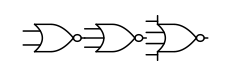

In [25]:
d = schem.Drawing()
d.add(l.NOR2)
d.add(l.NOR3)
d.add(l.NOR4)
d.draw()

### XOR

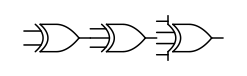

In [26]:
d = schem.Drawing()
d.add(l.XOR2)
d.add(l.XOR3)
d.add(l.XOR4)
d.draw()

## XNOR

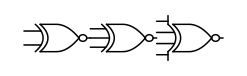

In [27]:
d = schem.Drawing()
d.add(l.XNOR2)
d.add(l.XNOR3)
d.add(l.XNOR4)
d.draw()

## Buffer

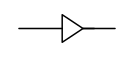

In [28]:
d = schem.Drawing()
d.add(l.BUF)
d.draw()

## Inverter

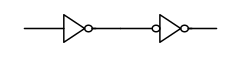

In [29]:
d = schem.Drawing()
d.add(l.NOT)
d.add(l.NOTNOT)
d.draw()

## FlipFlops
### Load my little helper library
```python
%load ../library/schemdraw_lib.py
%%writefile ../library/schemdraw_lib.py
```

In [14]:
# %load ../library/schemdraw_lib.py
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

def create_ff(mainlabel='FF', label_l=None, label_t=None, label_r=None, label_b=None, clkSign=True):
  """create dynamically a flipflop

    All labels are lists with signal definition form top to bottom spread out evenly or from left to right.
    Labels can have Latex notation like '$\overline{Q}$'

    Args:
        label_l (list): List of IO label left ['D','E','clk']
        label_t (list): List of IO label left ['SET']
        label_r (list): List of IO label left ['Q', '$\overline{Q}$']
        label_b (list): List of IO label left ['CLR']
        noClkSign (bool): Defining if clk triangle should be drawn work only on left labels, (extents 'clk' to '  clk') 

    Returns:
        bool: The object

  """
  # Left IO
  if label_l:
    cnt = len(label_l)
    if cnt == 1:
      loc = [0.8]
    elif cnt == 2:
      loc = [0.8,0.2]
    elif cnt == 3:
      loc = [0.8,0.5,0.2]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    if clkSign:
      for i in range(cnt):
        if label_l[i] == 'clk':
          loc_clk = loc[label_l.index('clk')]
          label_l[i] = '  clk'
        elif label_l[i] == 'CLK':
          loc_clk = loc[label_l.index('CLK')]
          label_l[i] = '  CLK'
    # Create IO's
    ff_iol  = {'cnt'    :cnt,
               'labels' :label_l,
               'loc'    :loc,
               'lblsize':15}
  else:
    ff_iol = None
  # Top IO
  if label_t:
    cnt = len(label_t)
    if cnt == 1:
      loc = [0.5]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_iot  = {'cnt'    :cnt,
               'labels' :label_t,
               'loc'    :loc,
               'lblsize':12}
  else:
    ff_iot = None

  # Right IO
  if label_r:
    cnt = len(label_r)
    if cnt == 1:
      loc = [0.8]
    elif cnt == 2:
      loc = [0.8,0.2]
    elif cnt == 3:
      loc = [0.8,0.5,0.2]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_ior  = {'cnt'    :cnt,
               'labels' :label_r,
               'loc'    :loc,
               'lblsize':15}
  else:
    ff_ior = None

  # Bottom IO
  if label_b:
    cnt = len(label_b)
    if cnt == 1:
      loc = [0.5]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_iob  = {'cnt'    :cnt,
               'labels' :label_b,
               'loc'    :loc,
               'lblsize':12}
  else:
    ff_iob = None


  if clkSign:
    if 'loc_clk' in locals():
      #loc_clk += 0.7
      #loc_clk = loc_clk/1*3
      loc_clk = loc_clk/1*4.5
      clkSign_path = [[[0,loc_clk-0.2],[0.3,loc_clk],[0,loc_clk+0.2]]]
    DFF_0 =  e.blackbox(3, 3*1.5, linputs=ff_iol, rinputs=ff_ior, tinputs=ff_iot, binputs=ff_iob, mainlabel=mainlabel)
    DFF = { 'name'  : mainlabel,
            'base'  : DFF_0,
            'paths' : clkSign_path # Add clk triangle
            #'paths' : [[[0,0.7],[0.3,0.9],[0,1.1]]] # Add clk triangle
          }
    return DFF
  else:
    return e.blackbox(d.unit, d.unit*1.5, linputs=ff_iol, rinputs=ff_ior, tinputs=ff_iot, binputs=ff_iob, mainlabel=mainlabel)

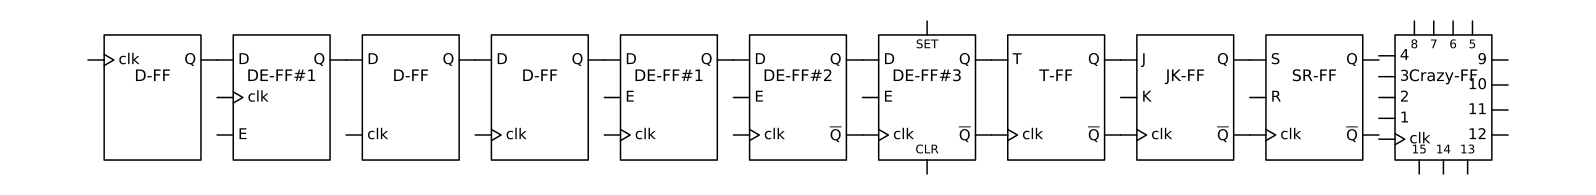

In [15]:
d = schem.Drawing()

ff_list = []
ff_list.append(create_ff(mainlabel='D-FF', label_l=['clk'], label_r=['Q'], clkSign=True))
ff_list.append(create_ff(mainlabel='DE-FF#1', label_l=['D','clk','E'], label_r=['Q']))
ff_list.append(create_ff(mainlabel='D-FF', label_l=['D','clk'], label_r=['Q'], clkSign=False))
ff_list.append(create_ff(mainlabel='D-FF', label_l=['D','clk'], label_r=['Q']))
ff_list.append(create_ff(mainlabel='DE-FF#1', label_l=['D','E','clk'], label_r=['Q']))
ff_list.append(create_ff(mainlabel='DE-FF#2', label_l=['D','E','clk'], label_r=['Q','$\overline{Q}$']))
ff_list.append(create_ff(mainlabel='DE-FF#3', label_l=['D','E','clk'], label_t=['SET'], label_r=['Q','$\overline{Q}$'], label_b=['CLR'], clkSign=True))
ff_list.append(create_ff(mainlabel='T-FF', label_l=['T','clk'], label_r=['Q','$\overline{Q}$'], clkSign=True))
ff_list.append(create_ff(mainlabel='JK-FF', label_l=['J','K','clk'], label_r=['Q','$\overline{Q}$'], clkSign=True))
ff_list.append(create_ff(mainlabel='SR-FF', label_l=['S','R','clk'], label_r=['Q','$\overline{Q}$'], clkSign=True))
ff_list.append(create_ff(mainlabel='Crazy-FF', label_l=['4','3','2','1','clk'], label_t=['5','6','7','8'], label_r=['9','10','11','12'], label_b=['13','14','15'], clkSign=True))

x_pos = 0
ff_inst = []
for ff in ff_list:
  ff_inst.append(d.add(ff, xy=(x_pos,0)))
  x_pos += 4

d.draw()

## Multiplexer

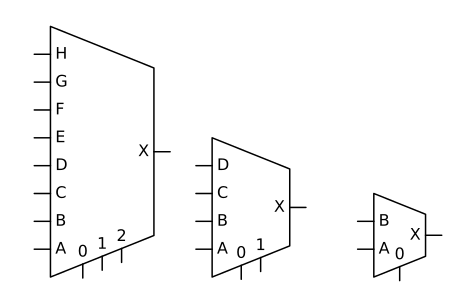

In [23]:
d = schem.Drawing()
m8 = d.add(e.mux(inputs=['A','B','C','D','E','F','G','H',], outputs=['X'], ctrls=['0','1', '2']))
m4 = d.add(e.mux(inputs=['A','B','C','D'], outputs=['X'], ctrls=['0','1']), xy=(5,0))
m2 = d.add(e.mux(inputs=['A','B'], outputs=['X'], ctrls=['0']), xy=(10,0))

d.draw()